In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data = pd.read_csv('data-projet7.csv', decimal =".")
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
5,ALB,2008,6,100,"1171,1412",7297
6,ALB,2008,7,100,"1201,1324",7297
7,ALB,2008,8,100,"1240,8976",7297
8,ALB,2008,9,100,"1285,6914",7297
9,ALB,2008,10,100,"1325,2533",7297


In [3]:
data.shape

(11599, 6)

In [4]:
for i in data.columns:
    print("La colonne '{}' :".format(i), any(pd.isna(data[i])))


La colonne 'country' : False
La colonne 'year_survey' : False
La colonne 'quantile' : False
La colonne 'nb_quantiles' : False
La colonne 'income' : False
La colonne 'gdpppp' : True


<p> Des valeurs NaN sont présentes dans la colonne 'gdpppp' </p>

In [5]:
data['gdpppp'] = data['gdpppp'].fillna(0)
#Voir après par quoi remplacer, 0 n'étant peut-être pas le bon chiffre

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null object
gdpppp          11599 non-null object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


Aucune colonne nulle ; Par contre on peut voir que 'income' et 'gdpppp' sont object et non numeric

In [7]:
data['gdpppp'] = data['gdpppp'].astype(str)
data['gdpppp'] = data['gdpppp'].replace(",", ".")
data['gdpppp'] = [x.replace(',', '.') for x in data['gdpppp']]
data['gdpppp'] = pd.to_numeric(data['gdpppp'])

data['income'] = data['income'].astype(str)
data['income'] = data['income'].replace(",", ".")
data['income'] = [x.replace(',', '.') for x in data['income']]
data['income'] = pd.to_numeric(data['income'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null float64
gdpppp          11599 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


On a bien nos colonnes 'income' et 'gdpppp' en float et plus en object

In [9]:
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.159900e+04
mean,2007.982757,50.500819,100.0,6069.224260,4.935532e+04
std,0.909633,28.868424,0.0,9414.185972,3.966582e+05
min,2004.000000,1.000000,100.0,16.719418,0.000000e+00
25%,2008.000000,25.500000,100.0,900.685515,2.340000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.505000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.838850e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


# Mission 1

## Années des données utilisées

<p> Testons d'abord les données ont bien une année pour chaque pays : </p>

In [10]:
for i in range(2004,2012):
    country_year  = data[data['year_survey'] == i]
    print("Le nombre de pays pour l'année {} est de : ".format(i))
    print(len(country_year['country'].unique()))

Le nombre de pays pour l'année 2004 est de : 
1
Le nombre de pays pour l'année 2005 est de : 
0
Le nombre de pays pour l'année 2006 est de : 
5
Le nombre de pays pour l'année 2007 est de : 
15
Le nombre de pays pour l'année 2008 est de : 
76
Le nombre de pays pour l'année 2009 est de : 
12
Le nombre de pays pour l'année 2010 est de : 
6
Le nombre de pays pour l'année 2011 est de : 
1


<p> Ce n'est pas le cas, deux solutions s'offrent donc à nous : <br/>
<ol><li>Prendre uniquement l'année ayant le plus de pays (ici 2008) </li>
    <li>Prendre une année par pays (mais problème dans la véracité des données)</li></ol>
</p>

In [11]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

<p> Les années présentes dans les données sont : 
    <ul><li> 2004 </li>
        <li> 2006 </li>
        <li> 2007 </li>
        <li> 2008 </li>
        <li> 2009 </li>
        <li> 2010 </li>
        <li> 2011 </li> </ul> 
</p>

## Nombre de pays présents

In [12]:
print('Le nombre de pays est de : ',len(data['country'].unique()), "toute année confondue")

Le nombre de pays est de :  116 toute année confondue


## Population couverte par l'analyse (%age de la population mondiale)

<p> Pour ce pourcentage nous prendront comme base la population mondiale de chaque année concernée. Nous établierons ensuite la moyenne de toutes ces années. </p>

In [13]:
pop = pd.read_csv('pop.csv')
pop.head()
#A merge avec l'autre df, voir ensuite avec le % de population pour chaque pays

,Unnamed: 0,Country,Countrycode3,Year,Population,PopCovr_new
0,0,Afghanistan,AFG,2007,26.911530,All
1,1,Afghanistan,AFG,2008,27.658890,All
2,2,Albania,ALB,1996,3.092034,All
3,3,Albania,ALB,2002,3.123112,All
4,4,Albania,ALB,2005,3.082172,All


## De quel type de quantile s'agit-il 

<p> Les quantiles utilisés dans les données sont des centiles. <br/>
    Le centile nous permet d'être précis dans nos calculs ; Et n'enlève pas la possibilité de prendre plus large (en décile par exemple).
</p>

## PPP

<p> Le PPP (Purchasing Power Parity) permet de prendre en compte non seulement les revenus des habitant mais aussi le coût de la vie dans le pays. <br/>
    Il est donc de ce fait beaucoup plus précis sur la richesse des habitants. </p>

# Mission 2

## Diversité des pays 

In [14]:
#Définition d'une fonction decile pour transformer les centiles en déciles
def decile (value):
    if 0<=int(value)<11 :
        return int(1)
    elif 11<=int(value)<21:
        return int(2)
    elif 21<=int(value)<31:
        return int(3)
    elif 31<=int(value)<41:
        return int(4) 
    elif 41<=int(value)<51:
        return int(5) 
    elif 51<=int(value)<61:
        return int(6) 
    elif 61<=int(value)<71:
        return int(7) 
    elif 71<=int(value)<81:
        return int(8) 
    elif 81<=int(value)<91:
        return int(9) 
    elif 91<=int(value)<101:
        return int(10) 
    else:
        return 'ERROR'
    
#Automatisation avec boucle ici ? Voir comment, chronophage à la main

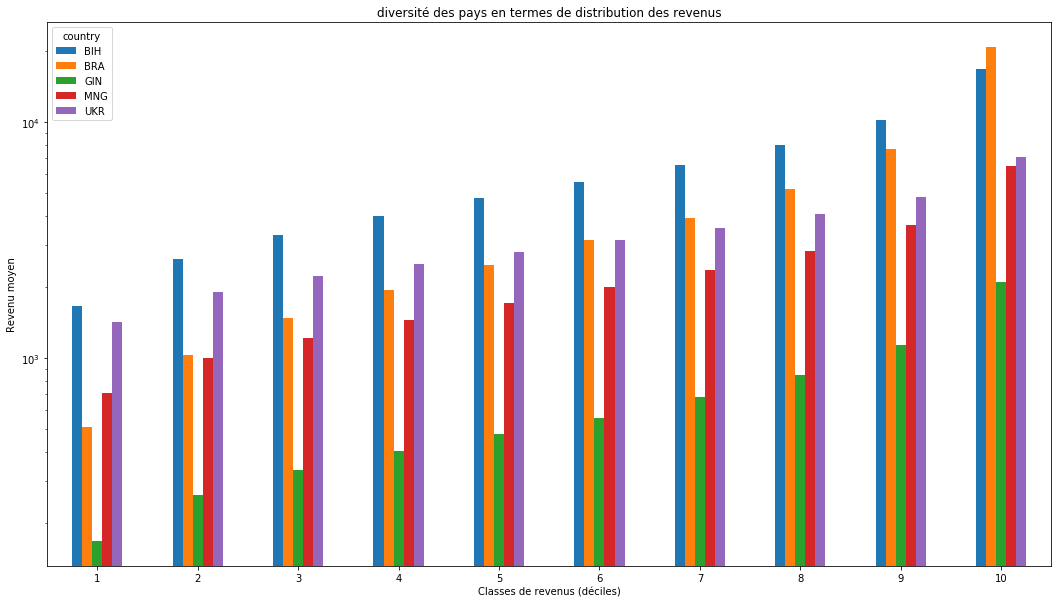

In [61]:
np.random.seed(1)
sample = np.random.randint(116, size=5)
X = data['country'].unique()[sample]
sampled_data = data[data.country.isin(X)]

sampled_data = sampled_data.reset_index()
#On applique la fonction decile au df : 
sampled_data['decile'] = sampled_data['quantile'].map(decile)

sampled_crosstab = pd.crosstab(index=sampled_data["decile"], 
                           columns=sampled_data["country"], 
                           values=sampled_data["income"],
                          aggfunc = np.mean)
#print(sampled_crosstab)
sampled_crosstab.plot(kind="bar", figsize=(18,10), stacked=False)
plt.title("diversité des pays en termes de distribution des revenus")
plt.xlabel("Classes de revenus (déciles)")
plt.ylabel("Revenu moyen")
plt.yscale('log')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
#plt.savefig("Graphiques/diversité_pays.png")
plt.show()

<p> Ici les classes ont été passées en décile et non centile (pour plus de lisibilité), voir si on garde comme ça.</p>

## Courbe de Lorenz

### Définition de la fonction : 

In [16]:
def lorenz(df, name=None):
    #On prend uniquement les colonnes utiles :
    data_gini = df[['country', 'quantile', 'income']]
    
    #Calcul du coef de gini et courbe de Lorenz :    
    for pays in data_gini['country'].unique():
        #Gini
        ##D'abord trier les valeurs
        sorted_df = df['income'][df['country'] == pays].copy()
        sorted_df.sort_values()
        n = df[df['country'] == pays].size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_df)])
        coef = coef_*weighted_sum/(sorted_df.sum()) - const_
        
        #Courbe de Lorenz
        data_lorenz = data_gini[data_gini['country'] == pays]['income'].sort_values()
        data_lorenz = data_lorenz.cumsum() / data_lorenz.sum()

        fig, ax = plt.subplots(figsize=[6,6])
        ## Mise en place de la courbe
        ax.scatter(np.arange(data_lorenz.size)/(data_lorenz.size-1)*100, data_lorenz*100, 
                   marker='x', color='red', s=1)

        ## courbe à coéfficient d'égalité : 
        ax.plot([0,100], [0,100], color='black')
        plt.title("Courbe de Lorenz : {}".format(pays))
        plt.xlabel("Pourcentage de la population")
        plt.ylabel("Revenu Moyen")
        #Ajouter une étiquette avec le coefficient de Gini ? 
        #plt.savefig("Graphiques/courbe_de_lorenz_{}.png".format(pays))
        plt.show()

<p> Ajouter une étiquette avec l'indice de Gini ? </p>
<p> Attention les coef de gini sont négatif, voir en détails pourquoi</p>

### Les courbes 

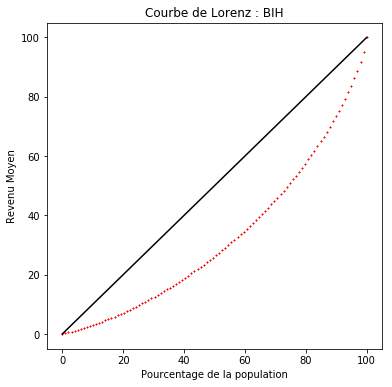

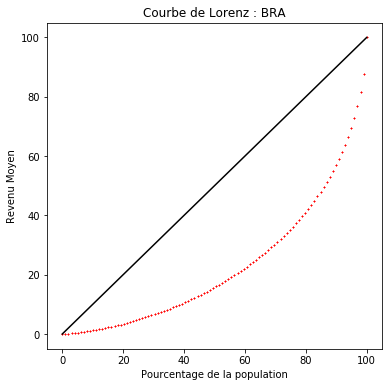

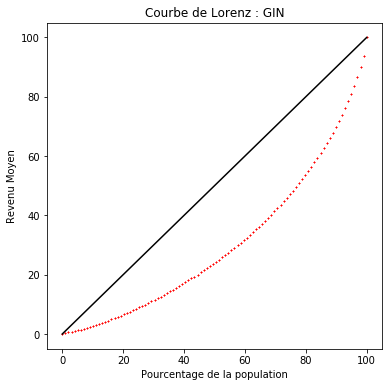

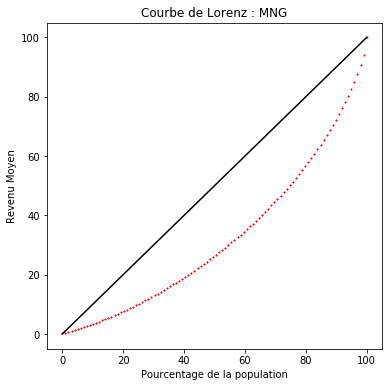

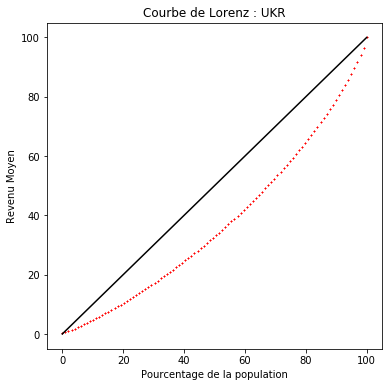

In [17]:
lorenz(sampled_data)

## Evolution de l'indice de Gini au fil des ans 

<p> Pour cette question nous allons prendre le fichier traité dans le fichier "indice_gini_pop" </p>

In [18]:
indice_gini = pd.read_csv("gini.csv")
indice_gini = indice_gini[['Country', 'Countrycode3', 'Year', 'Gini']]
indice_gini = indice_gini.groupby(['Country','Countrycode3', 'Year']).mean()
indice_gini = indice_gini.reset_index()
indice_gini.head()

,Country,Countrycode3,Year,Gini
0,Afghanistan,AFG,2007,29.00
1,Afghanistan,AFG,2008,27.80
2,Albania,ALB,1996,28.00
3,Albania,ALB,2002,31.74
4,Albania,ALB,2005,30.60


Les indices sont ici multipliés par 100, attention si courbes de Lorenz après.

In [19]:
sampled_gini = indice_gini[indice_gini["Countrycode3"].isin(X)]
sampled_gini.head()

,Country,Countrycode3,Year,Gini
356,Bosnia and Herzegovina,BIH,1991,32.90
357,Bosnia and Herzegovina,BIH,2001,29.97
358,Bosnia and Herzegovina,BIH,2004,34.04
359,Bosnia and Herzegovina,BIH,2007,33.06
360,Bosnia and Herzegovina,BIH,2011,33.83


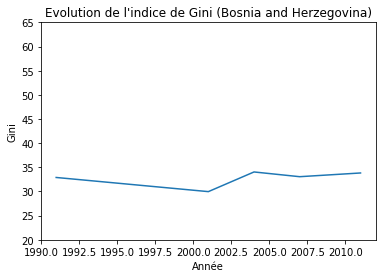

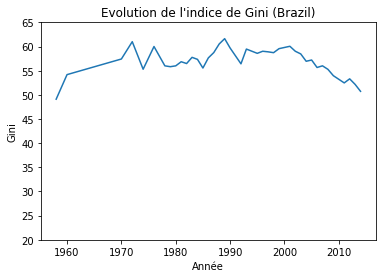

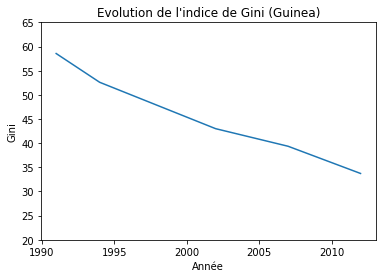

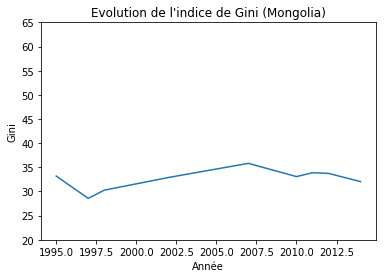

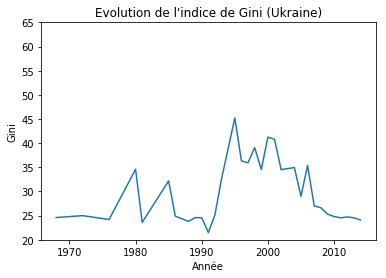

In [20]:
for pays in sampled_gini['Country'].unique():    
    Y = sampled_gini[sampled_gini['Country'] == pays]
    plt.plot(Y['Year'], Y['Gini'])
    plt.title("Evolution de l'indice de Gini ({})".format(pays))
    plt.xlabel('Année')
    plt.ylabel('Gini')
    plt.ylim(20,65) #On set la limit au min et max des 5 pays pour avoir la même échelle
    plt.show()

## Classement des pays par indice de Gini 

### Calcul des indices de Gini pour chaque pays 

On se sert du fichier indice_gini pour récupérer les indices

In [141]:
data_gini = pd.merge(data, indice_gini, left_on=['country', 'year_survey'], 
                     right_on=['Countrycode3', 'Year'], how='left')
data_gini = data_gini[['Country', 'country', 'year_survey', 
                       'quantile', 'nb_quantiles', 'income', 
                       'gdpppp', 'Gini']]
data_gini = data_gini.rename(columns={'country':'code', 'year_survey':'annee'})
data_gini.head()

,Country,code,annee,quantile,nb_quantiles,income,gdpppp,Gini
0,Albania,ALB,2008,1,100,"728,89795",7297,29.98
1,Albania,ALB,2008,2,100,"916,66235",7297,29.98
2,Albania,ALB,2008,3,100,"1010,916",7297,29.98
3,Albania,ALB,2008,4,100,"1086,9078",7297,29.98
4,Albania,ALB,2008,5,100,"1132,6997",7297,29.98


<p> Attention des noms de pays sont manquant (et donc indice de gini) </p>
<p> On a pas tous les pays de présents dans le fichier gini...</p>

#### Moyenne et pays avec le plus bas indice de Gini

In [142]:
data_gini_sorted_low = data_gini.groupby(['Country', 'code']).mean().sort_values(by='Gini')

print("La moyenne de tous les indices est de : ", round(data_gini_sorted_low['Gini'].mean()))
print("\n")
print("Voici le df des 5 pays ayant l'indice le plus faible :")
data_gini_sorted_low[0:5]

La moyenne de tous les indices est de :  39


Voici le df des 5 pays ayant l'indice le plus faible :


,,annee,quantile,nb_quantiles,Gini
Country,code,,,,
Hungary,HUN,2008.0,50.5,100.0,26.365
Ukraine,UKR,2008.0,50.5,100.0,26.640
Slovakia,SVK,2008.0,50.5,100.0,27.775
Belarus,BLR,2008.0,50.5,100.0,27.830
Slovenia,SVN,2008.0,50.5,100.0,28.644


#### Pays avec le plus haut indice de Gini

In [143]:
data_gini_sorted_high = data_gini.groupby(['Country', 'code']).mean().sort_values(by='Gini', ascending=False)

print("Voici le df des 5 pays ayant l'indice le plus fort :")
data_gini_sorted_high[0:5]

Voici le df des 5 pays ayant l'indice le plus fort :


,,annee,quantile,nb_quantiles,Gini
Country,code,,,,
South Africa,ZAF,2008.0,50.5,100.0,64.355000
Central African Republic,CAF,2008.0,50.5,100.0,56.240000
Brazil,BRA,2008.0,50.5,100.0,55.278333
Honduras,HND,2008.0,50.5,100.0,55.046667
Colombia,COL,2008.0,50.5,100.0,53.760000


#### Position de la France dans le classement :

In [24]:
data_gini_fr = data_gini.groupby(['Country', 'code']).mean().sort_values(by='Gini')
data_gini_fr = data_gini_fr.reset_index()

data_gini_fr[data_gini_fr['Country'] == 'France']

,Country,code,annee,quantile,nb_quantiles,income,gdpppp,Gini
38,France,FRA,2008.0,50.5,100.0,18309.407545,30357.0,35.12


<p> L'index de la France est le 38, elle est donc 39eme dans le classement </p>

# Mission 3

In [25]:
elasticite = pd.read_csv('coef_elasticite.csv')
elasticite = elasticite.drop(columns=['region', 'Cores2125_MAcatC1', 'Shortfall0611_obs', 
                                      'Shortfall0611_IGP', 'Shortfall1217_obs', 
                                      'Shortfall1217_IGP', 'S1', 'S2', 'S3', 'MLD_psu', 
                                      'survey', 'ThreeGen_IGPgsd', 'All2125_MEANp', 
                                      'All2125_IGP', 'All2125_IGP', 'All2125_MAcatC1', 
                                      'Cores2125_MEANp', 'Asher_Q4_IGpri', 
                                      'ThreeGen_IGPp1', 'ThreeGen_IGPg1', 
                                      'All2125_MEANc', 'Cores2125_MEANc', 
                                      'Cores2125_IGP','fragile', 'Q4_IGpri', 
                                      'BHQ1', 'BHQ2', 'BHQ3', 'BHQ4', 'Q4BH', 'Delta50', 
                                      'IGP', 'NL1', 'NL2', 'COR', 'MAcatM', 'MAcatC1', 
                                      'Q4child', 'ThreeGen_obs', 'C3', 'C4', 'C5', 
                                      'MEANp', 'MEANc', 'SDp', 'SDc', 'P1', 'P2', 'P3', 
                                      'P4', 'P5', 'C1', 'C2', 'GINIp', 'GINIc', 'cohort'])
#Faire ça autrement, ça prend trop de temps de tout enlever à la main comme ça
elasticite['IGEincome'] = elasticite['IGEincome'].fillna(0)
elasticite = elasticite[elasticite.IGEincome != 0]
#elasticite = elasticite.groupby(['countryname', 'year']).mean()
elasticite.head()
# ? 

,countryname,wbcode,iso3,incgroup2,incgroup4,year,status,parent,child,obs,IGEincome
60,Albania,ALB,ALB,Developing economies,Upper middle income,1970,Retrospective question,avg,all,420.0,0.815874
61,Albania,ALB,ALB,Developing economies,Upper middle income,1970,Retrospective question,avg,daughter,232.0,0.815874
62,Albania,ALB,ALB,Developing economies,Upper middle income,1970,Retrospective question,avg,son,188.0,0.815874
63,Albania,ALB,ALB,Developing economies,Upper middle income,1970,Retrospective question,dad,all,421.0,0.815874
64,Albania,ALB,ALB,Developing economies,Upper middle income,1970,Retrospective question,dad,daughter,232.0,0.815874


## Définition des fonctions :

In [26]:
import scipy.stats as st
from collections import Counter 

In [28]:
#Question 1 à 3 :
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    
    residues = st.norm(0,1).rvs(size=n)
    
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

#Question 4 :
#Cette fonction permet de mettre chaque valeur dans son quantile respectif (en fonction du nombre de quantile)
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a, b in zip(l_sorted, quantiles)}
    return pd.Series([q_dict[e] for e in l])

#Cette fonction permet d'associer chaque revenu des parents et enfants en une classe de revenus
#Selon le nombre de quantile
def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ['y_child', 'y_parents', 'c_i_child', 'c_i_parent']
    return sample


#Question 5 :
#Permet un calcul de la distribution de chaque quantile enfant par rapport au quantile parent ? 
#Refaire la description, pas clair du tout
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts['counts'].sum()
    
    if total == 0:
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset['counts'].values[0]
            distrib += [nb/total]
        else :
            distrib += [0]
    
    return distrib

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(['c_i_child', 'c_i_parent']).apply(len)
    counts = counts.reset_index()
    counts.columns = ['c_i_child', 'c_i_parent', 'counts']
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    
    return np.array(mat)

#Question 6 :
def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    cumul = np.array([0]*nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom = cumul, 
                width = 0.95, label = str(i+1) + 'e')
        cumul = cumul + np.array(child_quantile)
        plt.axis([.5, nb_quantiles*1.3, 0, 1])
        plt.title('P='+str(p))
        plt.legend()
        plt.xlabel('quantile parents')
        plt.ylabel('Probabilité du quantile enfant')
        plt.show()
        
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]



## Question 1 à 6 :

In [106]:
#Question 1 à 2 :
pj = 0.9 
nb_quantiles = 100
n = 1000*nb_quantiles

#Question 3 : 
y_child, y_parents = generate_incomes(n, pj)

#Question 4 :
sample = compute_quantiles(y_child, y_parents, nb_quantiles)

#Question 5 :
cd = conditional_distributions(sample, nb_quantiles)

#plot_conditional_distributions(pj, cd, nb_quantiles) #prend beaucoup de temps

c_i_child = 5
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, 
                                                                   c_i_child,pj, p))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.034


Passons maintenant au plot stacked_bar ; Pour plus de lisibilité nous choisirons des déciles et non des centiles :

## Question 6 (mise en place du stacked bar) :

In [101]:
pj_2 = 0.9 
nb_quantiles_2 = 10
n_2 = 1000*nb_quantiles_2
y_child_2, y_parents_2 = generate_incomes(n_2, pj_2)
sample_2 = compute_quantiles(y_child_2, y_parents_2, nb_quantiles_2)
cd_2 = conditional_distributions(sample_2, nb_quantiles_2)

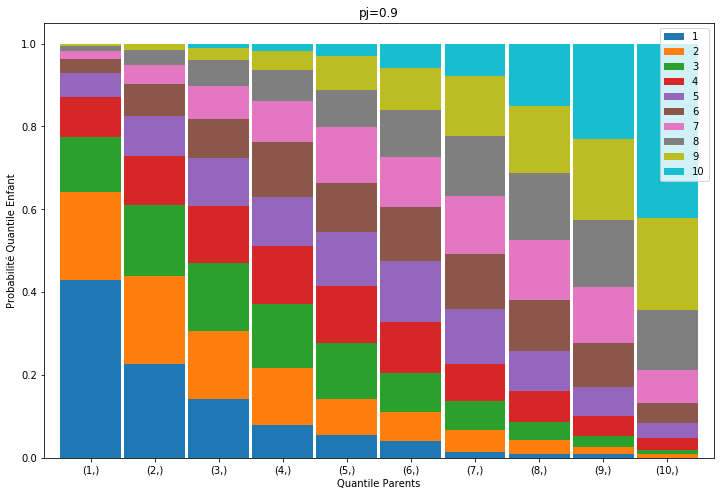

In [126]:
cd_df = pd.DataFrame(cd_2, columns = [np.arange(nb_quantiles_2)+1])
cd_df = cd_df.T #Voir avec Laura
cd_df.columns = np.arange(nb_quantiles_2)+1

cd_df.plot(kind="bar", figsize=(12,8), stacked=True, width=0.95)
plt.title("pj="+str(pj_2))
plt.xlabel("Quantile Parents")
plt.ylabel("Probabilité Quantile Enfant")
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
#plt.savefig("Graphiques/barstacked.png")
plt.show()

## Question 7 :

In [103]:
#On commence par effacer les variables inutiles, on garde les distributions conditionnelles
pj = None
nb_quantiles = None
n = None
y_child = None
y_parents = None
sample = None

## Question 8 :

<p>Pour cette question on va utiliser le fichier de la WID (donc notre df data_gini).</p>
<p>Nous allons créer 499 clones de chaque individus </p>

In [130]:
data_cloned = data_gini[['code', 'annee', 'quantile', 'income', 'Gini']]
data_cloned = pd.concat([data_cloned]*500, ignore_index=True)
data_cloned

,code,annee,quantile,income,Gini
0,ALB,2008,1,728.89795,29.98
1,ALB,2008,2,916.66235,29.98
2,ALB,2008,3,1010.91600,29.98
3,ALB,2008,4,1086.90780,29.98
4,ALB,2008,5,1132.69970,29.98
5,ALB,2008,6,1171.14120,29.98
6,ALB,2008,7,1201.13240,29.98
7,ALB,2008,8,1240.89760,29.98
8,ALB,2008,9,1285.69140,29.98
9,ALB,2008,10,1325.25330,29.98


## Question 9 :

<p> On assigne maintenant à chaque individus la classe c_i_parents conformément aux distributions trouvées précédemment </p>

In [122]:
cd

array([[0.24 , 0.117, 0.084, ..., 0.   , 0.   , 0.   ],
       [0.127, 0.085, 0.066, ..., 0.   , 0.   , 0.   ],
       [0.081, 0.077, 0.072, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.053, 0.076, 0.079],
       [0.   , 0.   , 0.   , ..., 0.072, 0.098, 0.128],
       [0.   , 0.   , 0.   , ..., 0.096, 0.116, 0.235]])